In [1511]:
# IMPORT THE REQUIRED LIBRARIES

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.lines import Line2D
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [1512]:
# Load dataset

file_path = './medianprices.csv'
median_data = pd.read_csv(file_path)

In [1513]:
# Identify Missing Values
missing_values = median_data.isnull().sum()

print(missing_values)

Year              0
No. of Sales      0
Median Price      0
Mean Price        0
No. of Sales.1    0
Median Price.1    0
Mean Price.1      0
No. of Sales.2    0
Median Price.2    0
Mean Price.2      0
dtype: int64


In [1514]:
# Prepare data for use. Remove all columns that aren't needed or are too related.

median_data = median_data.drop(['No. of Sales', 'Mean Price', 'No. of Sales.1', 'Median Price.1', 'Mean Price.1', 'No. of Sales.2', 'Median Price.2', 'Mean Price.2'], axis=1)

# Remove 2024 record as it is not yet complete.
median_data = median_data[median_data.Year != 2024]

# Rename Median Price column to be easier to reach.
median_data.rename(columns={'Median Price': 'MedianPrice'}, inplace=True)

print(median_data.head())

   Year  MedianPrice
0  2003       291500
1  2004       308869
2  2005       320000
3  2006       345000
4  2007       372000


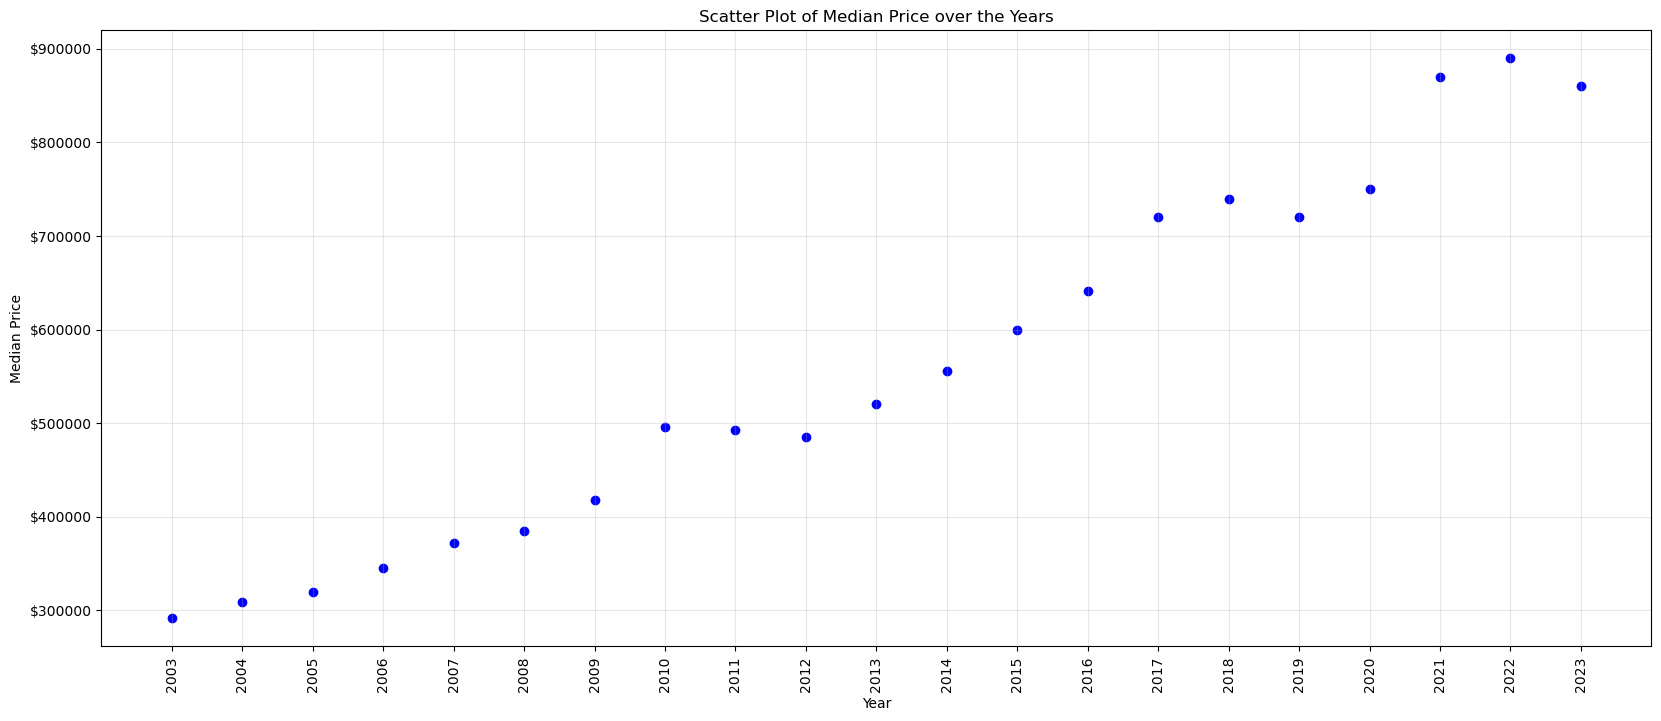

In [1515]:
# Plot a simple graph of median prices over the years.

plt.figure(figsize=(20, 8))
plt.scatter(median_data.Year, median_data['MedianPrice'], color='b')
plt.title('Scatter Plot of Median Price over the Years')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.grid(alpha=0.3)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])

plt.xticks(np.array(median_data['Year']))
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

In [1516]:
# Create some train and test data to train our model.

# Dataframe including just the year.
X = pd.DataFrame(median_data['Year'])

# Dataframe including just the median price.
y = pd.DataFrame(median_data['MedianPrice'])

print(X.head())
print()

print(y.head())
print()

# Split data in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_TRAIN:", X_train)
print()
print("X_TEST:", X_test)
print()
print("Y_TRAIN:", y_train)
print()
print("Y_TEST:", y_test)

   Year
0  2003
1  2004
2  2005
3  2006
4  2007

   MedianPrice
0       291500
1       308869
2       320000
3       345000
4       372000

X_TRAIN:     Year
14  2017
16  2019
4   2007
2   2005
6   2009
7   2010
1   2004
13  2016
0   2003
20  2023
19  2022
9   2012
8   2011
12  2015
11  2014
5   2008

X_TEST:     Year
15  2018
10  2013
3   2006
18  2021
17  2020

Y_TRAIN:     MedianPrice
14       720000
16       720000
4        372000
2        320000
6        418100
7        495500
1        308869
13       641000
0        291500
20       860000
19       890000
9        485000
8        493000
12       600000
11       556000
5        385000

Y_TEST:     MedianPrice
15       740000
10       520000
3        345000
18       870000
17       750000


In [1517]:
# Create Random Forest Regressor Model, train it.

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [1518]:
X_test.sort_values(by=['Year'], inplace=True)

# Make our model predict some already existing values, e.g., 2006, 2009, 2013, etc.
y_pred = rfr.predict(X_test)


In [1519]:
# Analyze some scores.
print('Mean Squared Error: %.2f' % mean_squared_error(y_pred, y_test))
print('R^2 Score: %.2f' % r2_score(y_pred, y_test))

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

Mean Squared Error: 64960420716.48
R^2 Score: -0.93
0.9950651350936236
-0.8423261689302466


In [1520]:
# Determine a parameter grid to improve the model's accuracy.

param_grid = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [1, 2, 4]
    
}

In [1521]:
#Create a GridSearch to find the best combination.

rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=2, scoring='r2')

In [1522]:
# Fit the train data in the model / Train the model with some data.

rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [10, 20, 50, 100, 200]},
             scoring='r2')

In [1523]:
# Display the best parameters, can be used to save time by using these parameters everytime rather than doing a grid search.

print(rfr_cv.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [1524]:
# Analyze some scores.

pred_cv = rfr_cv.predict(X_test)

print('Mean Squared Error: %.2f' % mean_squared_error(pred_cv, y_test))
print('R^2 Score: %.2f' % r2_score(pred_cv, y_test))

print(rfr_cv.score(X_train, y_train))
print(rfr_cv.score(X_test, y_test))

Mean Squared Error: 64287599500.00
R^2 Score: -1.00
0.9920860511413434
-0.8232444554736245


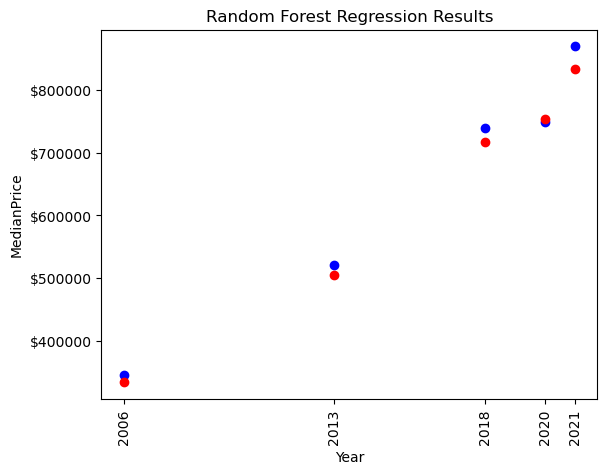

In [1525]:
# Display the actual values vs. what the model predicted.
y_test.sort_index(inplace=True)

plt.scatter(X_test.Year, y_test, color='blue') #plotting real points
plt.scatter(X_test.Year, y_pred,color='red') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('Year')
plt.ylabel('MedianPrice')

plt.xticks(rotation=90)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.xticks(np.array(X_test['Year']))
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

In [1526]:
# Prepare the data for future forecasting.

# Note which rows are future or not.
median_data['Future'] = False

# Simple function to return the last year of a dataset.
def get_last_year(df):
    return df['Year'].iloc[-1]

# Simple function to return the size of a dataset.
def get_last_index(df):
    return df.shape[0]

# Create a dataframe that includes all values from an original or previous dataframe and create a skeleton with values that need to be predicted.
def get_future(df):
    future_df = pd.DataFrame(index=[get_last_index(df)])

    future_df['Year'] = get_last_year(df) + 1
    future_df['Future'] = True
    
    m_and_f = pd.concat([df, future_df])
    
    return m_and_f


In [1527]:
# Create lag features, used to give the model more information to work on, this specifically creates new columns that denote the median price so many years before.
def create_lag(df):
    #print("CREATING LAG FOR:", df)
    target_map = df['MedianPrice'].to_dict()
    df['lag1'] = (df.index - 1).map(target_map)
    df['lag2'] = (df.index - 2).map(target_map)
    df['lag3'] = (df.index - 3).map(target_map)
    df['lag4'] = (df.index - 4).map(target_map)
    df['lag5'] = (df.index - 5).map(target_map)
    df['lag6'] = (df.index - 6).map(target_map)
    df['lag7'] = (df.index - 7).map(target_map)
    df['lag8'] = (df.index - 8).map(target_map)
    df['lag9'] = (df.index - 9).map(target_map)
    df['lag10'] = (df.index - 10).map(target_map)
    return df

In [1528]:
median_data = create_lag(median_data)

# print(median_data)

In [1529]:
# Create new train and test data with the updated dataset.

X_fut = pd.DataFrame(median_data.drop(['MedianPrice'], axis=1))

y_fut = pd.DataFrame(median_data['MedianPrice'])

print(X_fut.head())
print()

print(y_fut.head())
print()


X_train, X_test, y_train, y_test = train_test_split(X_fut, y_fut, test_size=0.2, random_state=1)

print("X_TRAIN:", X_train)
print()
print("X_TEST:", X_test)
print()
print("Y_TRAIN:", y_train)
print()
print("Y_TEST:", y_test)

   Year  Future      lag1      lag2      lag3      lag4  lag5  lag6  lag7  \
0  2003   False       NaN       NaN       NaN       NaN   NaN   NaN   NaN   
1  2004   False  291500.0       NaN       NaN       NaN   NaN   NaN   NaN   
2  2005   False  308869.0  291500.0       NaN       NaN   NaN   NaN   NaN   
3  2006   False  320000.0  308869.0  291500.0       NaN   NaN   NaN   NaN   
4  2007   False  345000.0  320000.0  308869.0  291500.0   NaN   NaN   NaN   

   lag8  lag9  lag10  
0   NaN   NaN    NaN  
1   NaN   NaN    NaN  
2   NaN   NaN    NaN  
3   NaN   NaN    NaN  
4   NaN   NaN    NaN  

   MedianPrice
0       291500
1       308869
2       320000
3       345000
4       372000

X_TRAIN:     Year  Future      lag1      lag2      lag3      lag4      lag5      lag6  \
14  2017   False  641000.0  600000.0  556000.0  520000.0  485000.0  493000.0   
16  2019   False  740000.0  720000.0  641000.0  600000.0  556000.0  520000.0   
4   2007   False  345000.0  320000.0  308869.0  291500.0  

In [1530]:
# Fit new data into the model & analyze some scores.
rfr.fit(X_train, y_train)

print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 Score: %.2f' % r2_score(y_test, y_pred))

rfr.score(X_train, y_train)

print(rfr_cv.best_params_)

Mean Squared Error: 64960420716.48
R^2 Score: -0.84
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [1531]:
# Create a new grid search model.
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=10, scoring='r2')

In [1532]:
# Compare the model with the original.

rfr_cv.fit(X_train, y_train)

pred_cv = rfr_cv.predict(X_test)

print(rfr_cv.best_params_)

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [1533]:
# Compare new scores.

print('Mean Squared Error: %.2f' % mean_squared_error(pred_cv, y_test))
print('R^2 Score: %.2f' % r2_score(pred_cv, y_test))

rfr_cv.score(X_train, y_train)


Mean Squared Error: 3705228198.96
R^2 Score: 0.85


0.9548695714053925

In [1534]:
# Create a function that finds the median price for a given future year.

def forecast(df):
    future_forecast = df.tail(1)
    # print("FUTUREFORECAST:", future_forecast)

    pred = rfr_cv.predict(future_forecast.drop(['MedianPrice'], axis=1))
    
    # print(pred)
    
    return pred

In [1535]:
# 

skeleton = get_future(median_data)

skeleton = create_lag(skeleton)
    
future_pred = forecast(skeleton)

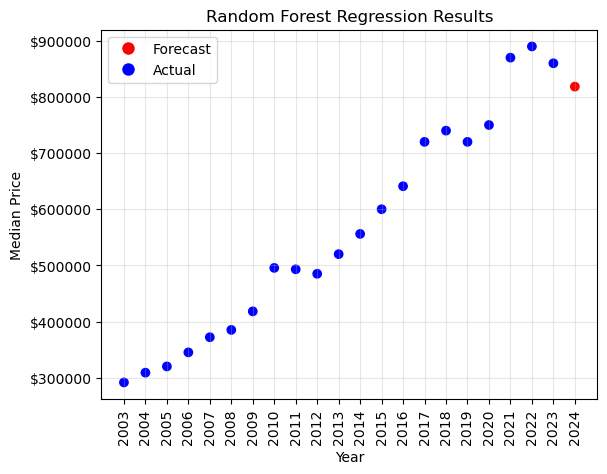

In [1536]:
### Create a table to display all true values & future forecasted values.

# Sort values by year.
X_test.sort_values(by=['Year'], inplace=True)

# Place the prediction in the last row.
skeleton.loc[get_last_index(median_data), "MedianPrice"] = future_pred

# Determine the colours of true vs false future values on the plot.
colours = (skeleton['Future'].iloc[0:])
colours[colours == True] = 'red'
colours[colours == False] = 'blue'


plt.scatter(skeleton['Year'], skeleton['MedianPrice'], color=colours) #plotting real points
plt.title("Random Forest Regression Results")
plt.xlabel('Year')
plt.ylabel('Median Price')

plt.xticks(rotation=90)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
plt.xticks(np.array(skeleton['Year']))

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

plt.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Forecast',
                          markerfacecolor='r', markersize=10),
                    Line2D([0], [0], marker='o', color='w', label='Actual',
                          markerfacecolor='b', markersize=10)],
            loc='upper left')

plt.grid(alpha=0.3)

plt.show()

In [1537]:
### A function to fit new data into the model, call this each time a new year is being forecasted.

def refit(df):
    X_fut = pd.DataFrame(df.drop(['MedianPrice'], axis=1))

    y_fut = pd.DataFrame(df['MedianPrice'])

    # print(X_fut.head())
    # print()

    # print(y_fut.head())
    # print()


    X_train, X_test, y_train, y_test = train_test_split(X_fut, y_fut, test_size=0.2, random_state=1)

    # print("X_TRAIN:", X_train)
    # print()
    # print("X_TEST:", X_test)
    # print()
    # print("Y_TRAIN:", y_train)
    # print()
    # print("Y_TEST:", y_test)
    
    pred_cv = rfr_cv.predict(X_test)

    print('Mean Squared Error: %.2f' % mean_squared_error(pred_cv, y_test))
    print('R^2 Score: %.2f' % r2_score(pred_cv, y_test))

    rfr_cv.score(X_train, y_train)
    rfr_cv.fit(X_train, y_train)
    
    print(rfr_cv.best_params_)
        

In [1538]:
### A function to call all functions required to create a skeleton, forecast a value and plot a table.

def forecast_next(prev):
    
    refit(prev)
    
    next = get_future(prev)
    
    # print("PREV:", prev)
    
    # print("NEXT:", next)

    next = create_lag(next)
    
    # print("CREATED LAG:", next)
    
    pred = forecast(next)
    
    # print(pred)
    
    # print(get_last_index(prev))
    
    next.loc[get_last_index(prev), "MedianPrice"] = pred

    colours = (next['Future'].iloc[0:])

    colours[colours == True] = 'red'
    colours[colours == False] = 'blue'

    plt.scatter(next['Year'], next['MedianPrice'], color=colours) #plotting real points
    plt.title("Random Forest Regression Results")
    plt.xlabel('Year')
    plt.ylabel('Median Price')
    plt.xticks(rotation=90)
    
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['${:.0f}'.format(x) for x in current_values])
    plt.xticks(np.array(next['Year']))
    
    current_values = plt.gca().get_xticks()
    plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
    
    plt.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Forecast',
                            markerfacecolor='r', markersize=10),
                        Line2D([0], [0], marker='o', color='w', label='Actual',
                            markerfacecolor='b', markersize=10)],
                loc='upper left')
    
    plt.grid(alpha=0.3)
    plt.show()
    
    return next

Mean Squared Error: 3661716107.15
R^2 Score: 0.87
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


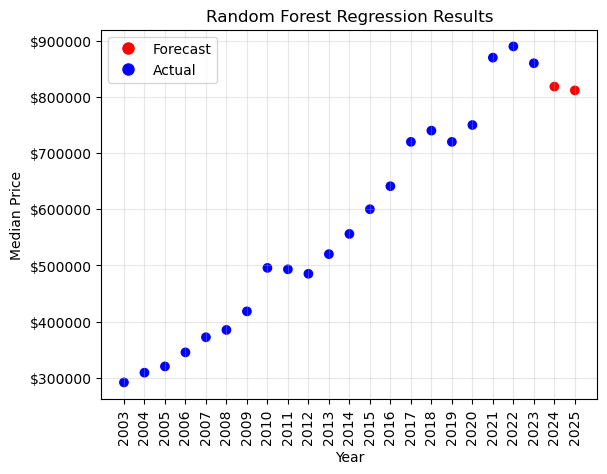

In [1539]:
skeleton = forecast_next(skeleton)

Mean Squared Error: 2480091106.87
R^2 Score: 0.91
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


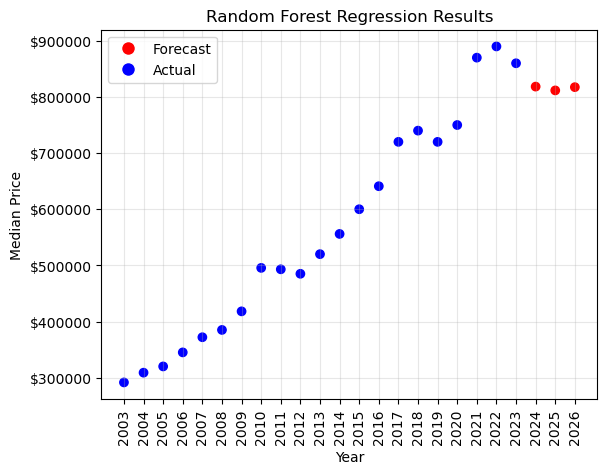

In [1540]:
skeleton = forecast_next(skeleton)

Mean Squared Error: 1375123489.37
R^2 Score: 0.95
{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


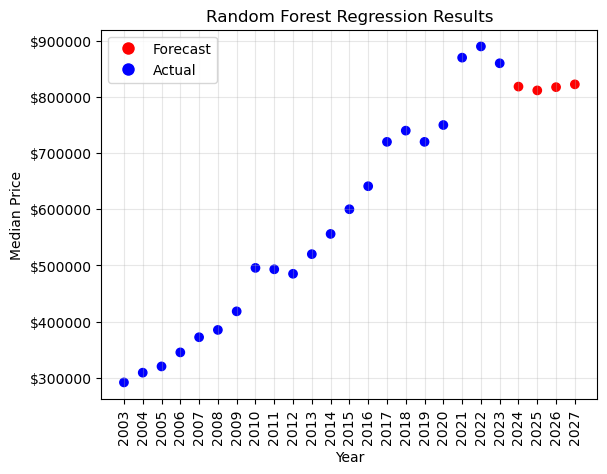

In [1541]:
skeleton = forecast_next(skeleton)

Mean Squared Error: 1681074303.68
R^2 Score: 0.94
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


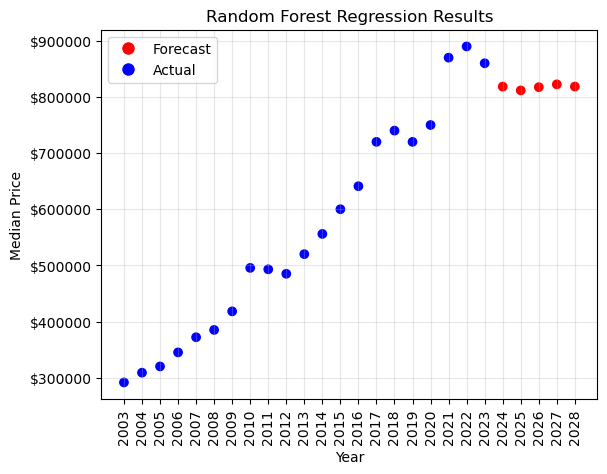

In [1542]:
skeleton = forecast_next(skeleton)